In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
raisin = pd.read_excel("C:/Users/진현킴/Downloads/Raisin_Dataset/Raisin_Dataset/Raisin_Dataset.xlsx")

In [6]:
raisin

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [7]:
raisin.dropna()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [8]:
raisin.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'class')

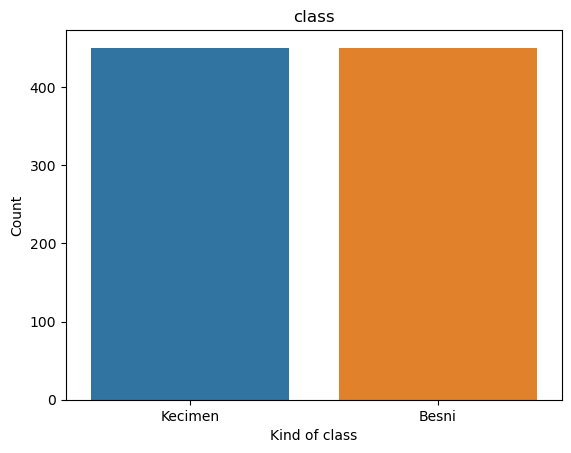

In [9]:
import seaborn as sns
sns.countplot(data = raisin, x="Class")
plt.xlabel("Kind of class")
plt.ylabel("Count")
plt.title("class")

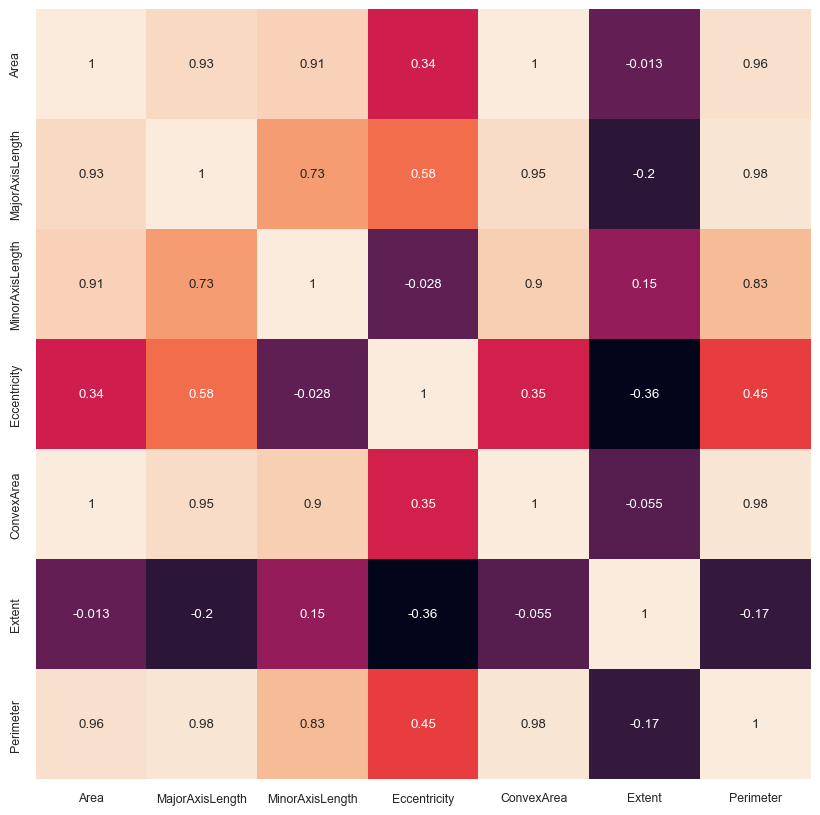

In [10]:
#상관 관계 행렬
df_corr=raisin.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in raisin.columns :
    raisin[i] = le.fit_transform(raisin[i])

In [12]:
raisin

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [13]:
X = raisin.iloc[:,0:7].values

In [14]:
y = raisin['Class']

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int32

In [16]:
from sklearn.preprocessing import LabelEncoder
## from keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
## y_one_hot = to_categorical(y_encoded, num_classes=2)
Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
print(y_train.shape)
print(y_test.shape)

(720, 2)
(180, 2)


In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


model = Sequential()

model.add(Dense(20,input_shape=(7,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________


C:\anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
23/23 [==============================] - 2s 27ms/step - loss: 0.7624 - accuracy: 0.4889 - val_loss: 0.6787 - val_accuracy: 0.5444
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6502 - accuracy: 0.5083 - val_loss: 0.5833 - val_accuracy: 0.5667
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5744 - accuracy: 0.6028 - val_loss: 0.5206 - val_accuracy: 0.7167
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5296 - accuracy: 0.7639 - val_loss: 0.4810 - val_accuracy: 0.8778
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5029 - accuracy: 0.8486 - val_loss: 0.4599 - val_accuracy: 0.8778
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4873 - accuracy: 0.8542 - val_loss: 0.4437 - val_accuracy: 0.8722
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4720 - accuracy: 0.8556 - val_loss: 0.4283 - val_accuracy: 0.8722
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3097 - accuracy: 0.8722 - val_loss: 0.2983 - val_accuracy: 0.9000
Epoch 60/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3090 - accuracy: 0.8722 - val_loss: 0.2981 - val_accuracy: 0.9000
Epoch 61/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3087 - accuracy: 0.8708 - val_loss: 0.2987 - val_accuracy: 0.9056
Epoch 62/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3073 - accuracy: 0.8708 - val_loss: 0.2987 - val_accuracy: 0.9056
Epoch 63/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3086 - accuracy: 0.8708 - val_loss: 0.2988 - val_accuracy: 0.9000
Epoch 64/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3074 - accuracy: 0.8681 - val_loss: 0.2984 - val_accuracy: 0.9000
Epoch 65/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3070 - accuracy: 0.8708 - val_loss: 0.2982 - val_accuracy: 0.9000
Epoch 

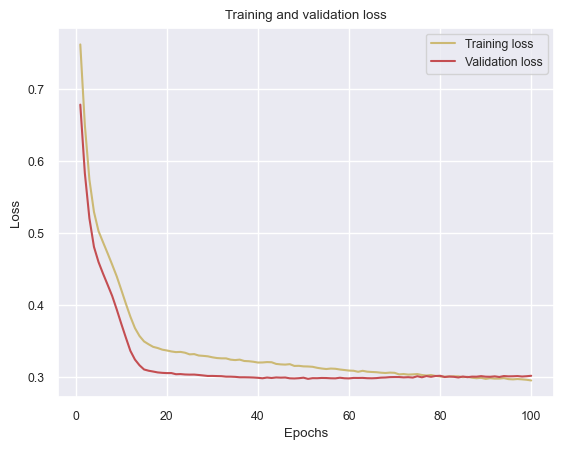

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

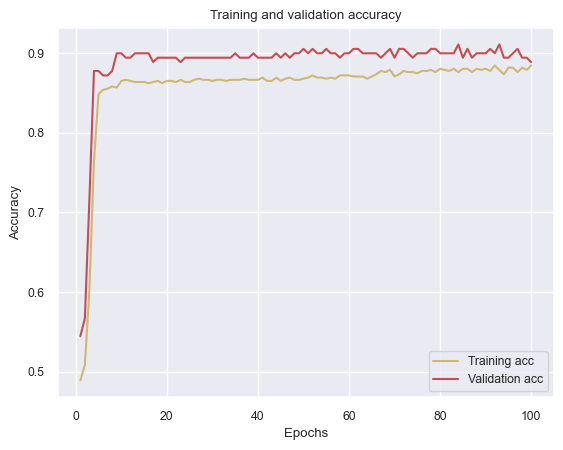

In [21]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        97
           1       0.87      0.89      0.88        83

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

[[86 11]
 [ 9 74]]


In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score(y_test_class, y_pred_class) # 0.6666666666666665

0.880952380952381

In [26]:
precision_score(y_test_class, y_pred_class) # 0.75

0.8705882352941177

In [27]:
recall_score(y_test_class, y_pred_class)

0.891566265060241